# Email classification task - Spam or not Spam

Data source - http://archive.ics.uci.edu/ml/datasets/Spambase 

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Load data

In [2]:
data = pd.read_csv('datasets\spambase.data', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Data exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

Observation:
1. Dataset is very small in size
2. None of the attributes have null values
3. Column 57 is the target attribute with 1 being Spam and 0 not Spam (ham)

In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


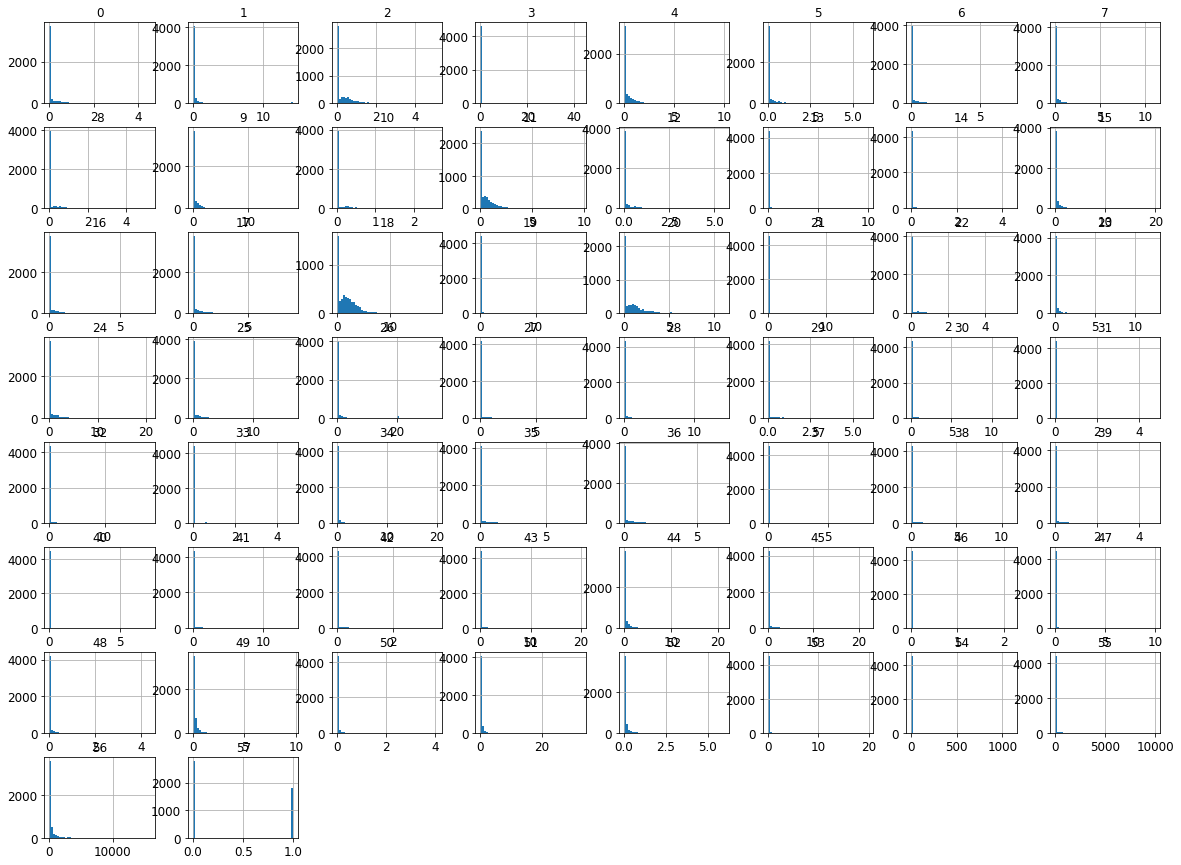

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

Observation -
1. Many attributes are tail heavy
2. Attributes have values as high as 10,000 and low being 0

Therefore attributes requires feature scaling

## Split data into Train and Test

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
train_set_copy = train_set.copy()

## Prepare data for ML algorithms

In [9]:
train_set_copy = train_set.drop(57, axis=1)
train_set_target = train_set[57].copy()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [11]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_set_copy)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

train_set_prepared = full_pipeline.fit_transform(train_set_copy)

## Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=200).fit(train_set_prepared, train_set_target)

In [13]:
clf.score(train_set_prepared, train_set_target)

0.9271739130434783

In [14]:
some_data = train_set_copy.iloc[:5]
some_labels = train_set_target.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", clf.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions:  [1 0 0 1 0]
Labels: [1, 0, 0, 1, 0]


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error
train_predictions = clf.predict(train_set_prepared)
clf_mse = mean_squared_error(train_set_target, train_predictions)
clf_rmse = np.sqrt(clf_mse)
clf_rmse

0.26986308928143865

Obervation:
Logistic regression did a good job in fitting the data

## K Neighbors Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3).fit(train_set_prepared, train_set_target)

In [17]:
print("Predictions: ", knc.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions:  [1 0 0 1 0]
Labels: [1, 0, 0, 1, 0]


In [18]:
train_predictions_knc = knc.predict(train_set_prepared)
knc_mse = mean_squared_error(train_set_target, train_predictions_knc)
knc_rmse = np.sqrt(knc_mse)
knc_rmse

0.22421360157322032

Observation:
K Neighbors Classifier performed better than Logistic Regression

### Cross validation for K Neighbors Classifier

In [19]:
from sklearn.model_selection import cross_validate
scores = cross_validate(knc, train_set_prepared, train_set_target, scoring="neg_mean_squared_error", cv=10,
                         return_train_score=True)

In [20]:
print("Scores:", scores)

Scores: {'fit_time': array([0.046983  , 0.04999995, 0.04101491, 0.04700899, 0.04099774,
       0.04199576, 0.05499601, 0.05501318, 0.06399655, 0.05599618]), 'score_time': array([0.08300352, 0.08201098, 0.08100319, 0.08200026, 0.08000064,
       0.0840044 , 0.11100316, 0.10699987, 0.11200047, 0.11100173]), 'test_score': array([-0.11141304, -0.09782609, -0.08152174, -0.10597826, -0.07336957,
       -0.10597826, -0.10597826, -0.08423913, -0.0923913 , -0.07880435]), 'train_score': array([-0.05706522, -0.05072464, -0.05042271, -0.0513285 , -0.05253623,
       -0.05012077, -0.04921498, -0.05072464, -0.0513285 , -0.05253623])}


### Cross validation for Logistic regressor

In [22]:
clf_scores = cross_validate(clf, train_set_prepared, train_set_target,
                         scoring="neg_mean_squared_error", cv=10)
clf_rmse_scores = np.sqrt(scores)

TypeError: loop of ufunc does not support argument 0 of type dict which has no callable sqrt method

In [23]:
print("Scores:", clf_scores)
print("Mean:", clf_scores.mean())
print("Standard deviation:", clf_scores.std())

Scores: {'fit_time': array([0.07301879, 0.07000232, 0.0759995 , 0.06500053, 0.07100153,
       0.06400156, 0.05999851, 0.08600163, 0.06499767, 0.06499362]), 'score_time': array([0.00098062, 0.0009985 , 0.00100017, 0.        , 0.00099874,
       0.00100088, 0.        , 0.        , 0.0010078 , 0.        ]), 'test_score': array([-0.06521739, -0.08152174, -0.08967391, -0.0951087 , -0.04891304,
       -0.0923913 , -0.07880435, -0.0625    , -0.08152174, -0.07065217])}


AttributeError: 'dict' object has no attribute 'mean'

In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Evaluate on Test set 

In [25]:
final_model = knc

X_test = test_set.drop(57, axis=1)
y_test = test_set[57].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [26]:
type(final_predictions)

numpy.ndarray

In [27]:
final_rmse

0.32951120315946836

In [32]:
final_model.score(X_test_prepared, y_test)

0.8914223669923995

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

np.set_printoptions(precision=2)

class_names = ['Not Spam','Spam']
class_names = np.asarray(class_names)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, final_predictions, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, final_predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()